In [1]:
using PyPlot
function chop(mat, tol = 1e-5)
    for i in eachindex(mat)
        if abs(mat[i]) < tol
            mat[i] = 0.
            elseif mat[i].im<tol
            mat[i]=mat[i].re
        end
    end
    mat
end

function hermitian(n)
    a=rand(n,n)+1im*rand(n,n)
    b=triu(a,1)
    M=b+transpose(conj(b))+Diagonal(rand(n,n))
    return M
end

function histograma(n::Int)
    A=hermitian(n)  
    vecs=eigvecs(A)
    B=inv(vecs)*A*vecs
    BB=chop(B)
    H=expm(-im*BB)
    map(angle,eigvals(H))
end

histograma (generic function with 1 method)

In [2]:
x=histograma(1000);

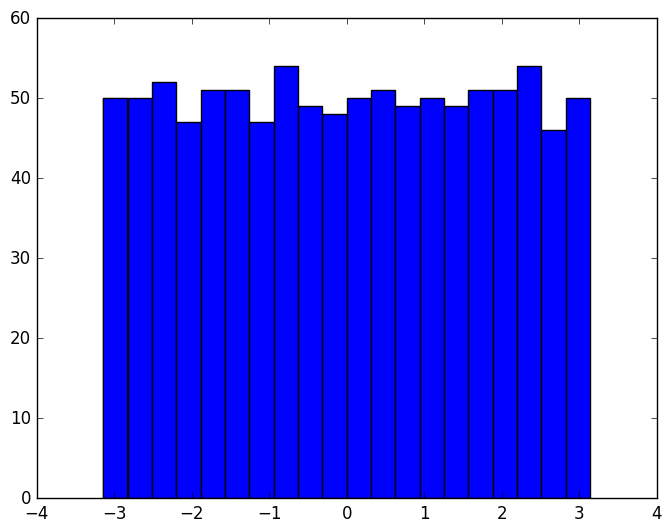

([50.0,50.0,52.0,47.0,51.0,51.0,47.0,54.0,49.0,48.0,50.0,51.0,49.0,50.0,49.0,51.0,51.0,54.0,46.0,50.0],[-3.14153,-2.82759,-2.51364,-2.1997,-1.88576,-1.57182,-1.25788,-0.943935,-0.629993,-0.316051  …  0.311833,0.625775,0.939717,1.25366,1.5676,1.88154,2.19548,2.50943,2.82337,3.13731],Any[PyObject <matplotlib.patches.Rectangle object at 0x7f1598841750>,PyObject <matplotlib.patches.Rectangle object at 0x7f1598841e10>,PyObject <matplotlib.patches.Rectangle object at 0x7f15987d54d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f15987d5b50>,PyObject <matplotlib.patches.Rectangle object at 0x7f15987e4210>,PyObject <matplotlib.patches.Rectangle object at 0x7f15987e4890>,PyObject <matplotlib.patches.Rectangle object at 0x7f15987e4f10>,PyObject <matplotlib.patches.Rectangle object at 0x7f15987f05d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f15987f0c50>,PyObject <matplotlib.patches.Rectangle object at 0x7f15987fe310>,PyObject <matplotlib.patches.Rectangle object at 0x7f15987fe990

In [3]:
h = plt[:hist](x,20) 

In [15]:
using Base.Test

function hermitian(n::Int)
    a=rand(n,n)+1im*rand(n,n)
    b=triu(a,1)
    M=b+transpose(conj(b))+Diagonal(rand(n,n))
    return M
end

function daga(state::Array{Complex{Float64},1})
    return transpose(conj(state))
end

function proyeccion(dim::Int)
    M=hermitian(dim)
    A=zeros(dim,dim)
    vecs=eigvecs(M)
    for i in 1:dim
        A+=kron(vecs[:,i],daga(vecs[:,i]))
    end
    # chop(A)
    return A
end

#La función prueba probará si la matriz obtenida a través de la función proyeccion es unitaria
function prueba(dim::Int)
    MM=hermitian(dim)
    M=proyeccion(dim)
    A=eye(dim)-M
    b=0
    for i in A
        b+=abs(i)
    end
    if b>1e-5
        return false
    end
    return true
end
    
@test ishermitian(hermitian(3))    
@test prueba(3)